<a href="https://colab.research.google.com/github/RafsanJany-44/Thesis_Project/blob/main/Feature_Selection_numeric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/EEG_HMC_FeatureExtraction_numeric.csv")
X = data.iloc[:,0:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,Sleep Stage,35903.700356
1,MeanP_Alpha_F4,62.731243
2,MedianF_Alpha_F4,625.441584
3,MeanF_Alpha_F4,4186.932107
4,Spect4al Edge_Alpha_F4,4760.597022
...,...,...
71,MeanP_Gamma_O2,26.248133
72,MedianF_Gamma_O2,539.956987
73,MeanF_Gamma_O2,374.193067
74,Spect4al Edge_Gamma_O2,358.426283


In [6]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
0              Sleep Stage  35903.700356
60           PeakF_Beta_O2  13501.822460
10           PeakF_Beta_F4   8003.136934
35           PeakF_Beta_C4   5144.466182
4   Spect4al Edge_Alpha_F4   4760.597022
3           MeanF_Alpha_F4   4186.932107
9    Spect4al Edge_Beta_F4   3953.173955
75          PeakF_Gamma_O2   3329.282921
7          MedianF_Beta_F4   3081.298755
29  Spect4al Edge_Alpha_C4   2979.921329


In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(featureScores.nlargest(10,'Score'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


                     Specs         Score
0              Sleep Stage  35903.700356
60           PeakF_Beta_O2  13501.822460
10           PeakF_Beta_F4   8003.136934
35           PeakF_Beta_C4   5144.466182
4   Spect4al Edge_Alpha_F4   4760.597022
3           MeanF_Alpha_F4   4186.932107
9    Spect4al Edge_Beta_F4   3953.173955
75          PeakF_Gamma_O2   3329.282921
7          MedianF_Beta_F4   3081.298755
29  Spect4al Edge_Alpha_C4   2979.921329


In [8]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[4.82510643e-01 1.55964604e-05 5.83895200e-03 1.56317286e-02
 1.34734883e-02 5.29197551e-03 1.84796813e-06 1.79908350e-02
 1.13392601e-02 1.06229783e-02 7.29687432e-03 1.87987864e-04
 1.35338290e-02 7.07114026e-03 6.49367433e-03 7.33801682e-03
 1.24033772e-03 2.97125834e-03 1.71809950e-02 1.08862707e-02
 5.01714793e-03 1.37208103e-05 7.94853824e-03 5.92194956e-03
 5.28260454e-03 4.09177101e-03 2.78199061e-05 5.83352581e-03
 1.35122710e-02 1.06806465e-02 5.08055773e-03 2.55200729e-04
 1.14091902e-02 9.46617651e-03 8.87347702e-03 5.58641637e-03
 2.33110104e-04 1.70601447e-02 6.97459056e-03 6.74487626e-03
 8.95671411e-03 1.26825617e-03 4.99136498e-03 1.78730018e-02
 1.45011032e-02 3.83671125e-03 1.94750716e-04 6.00085739e-03
 5.32239893e-03 5.09892595e-03 3.99196758e-03 2.70818006e-05
 8.97898224e-03 9.20561288e-03 7.47265979e-03 5.94173137e-03
 1.96563271e-06 8.08413759e-03 7.16324863e-03 6.81490539e-03
 6.95857997e-03 1.96687420e-04 1.70234641e-02 8.75134875e-03
 1.37100178e-02 8.460597

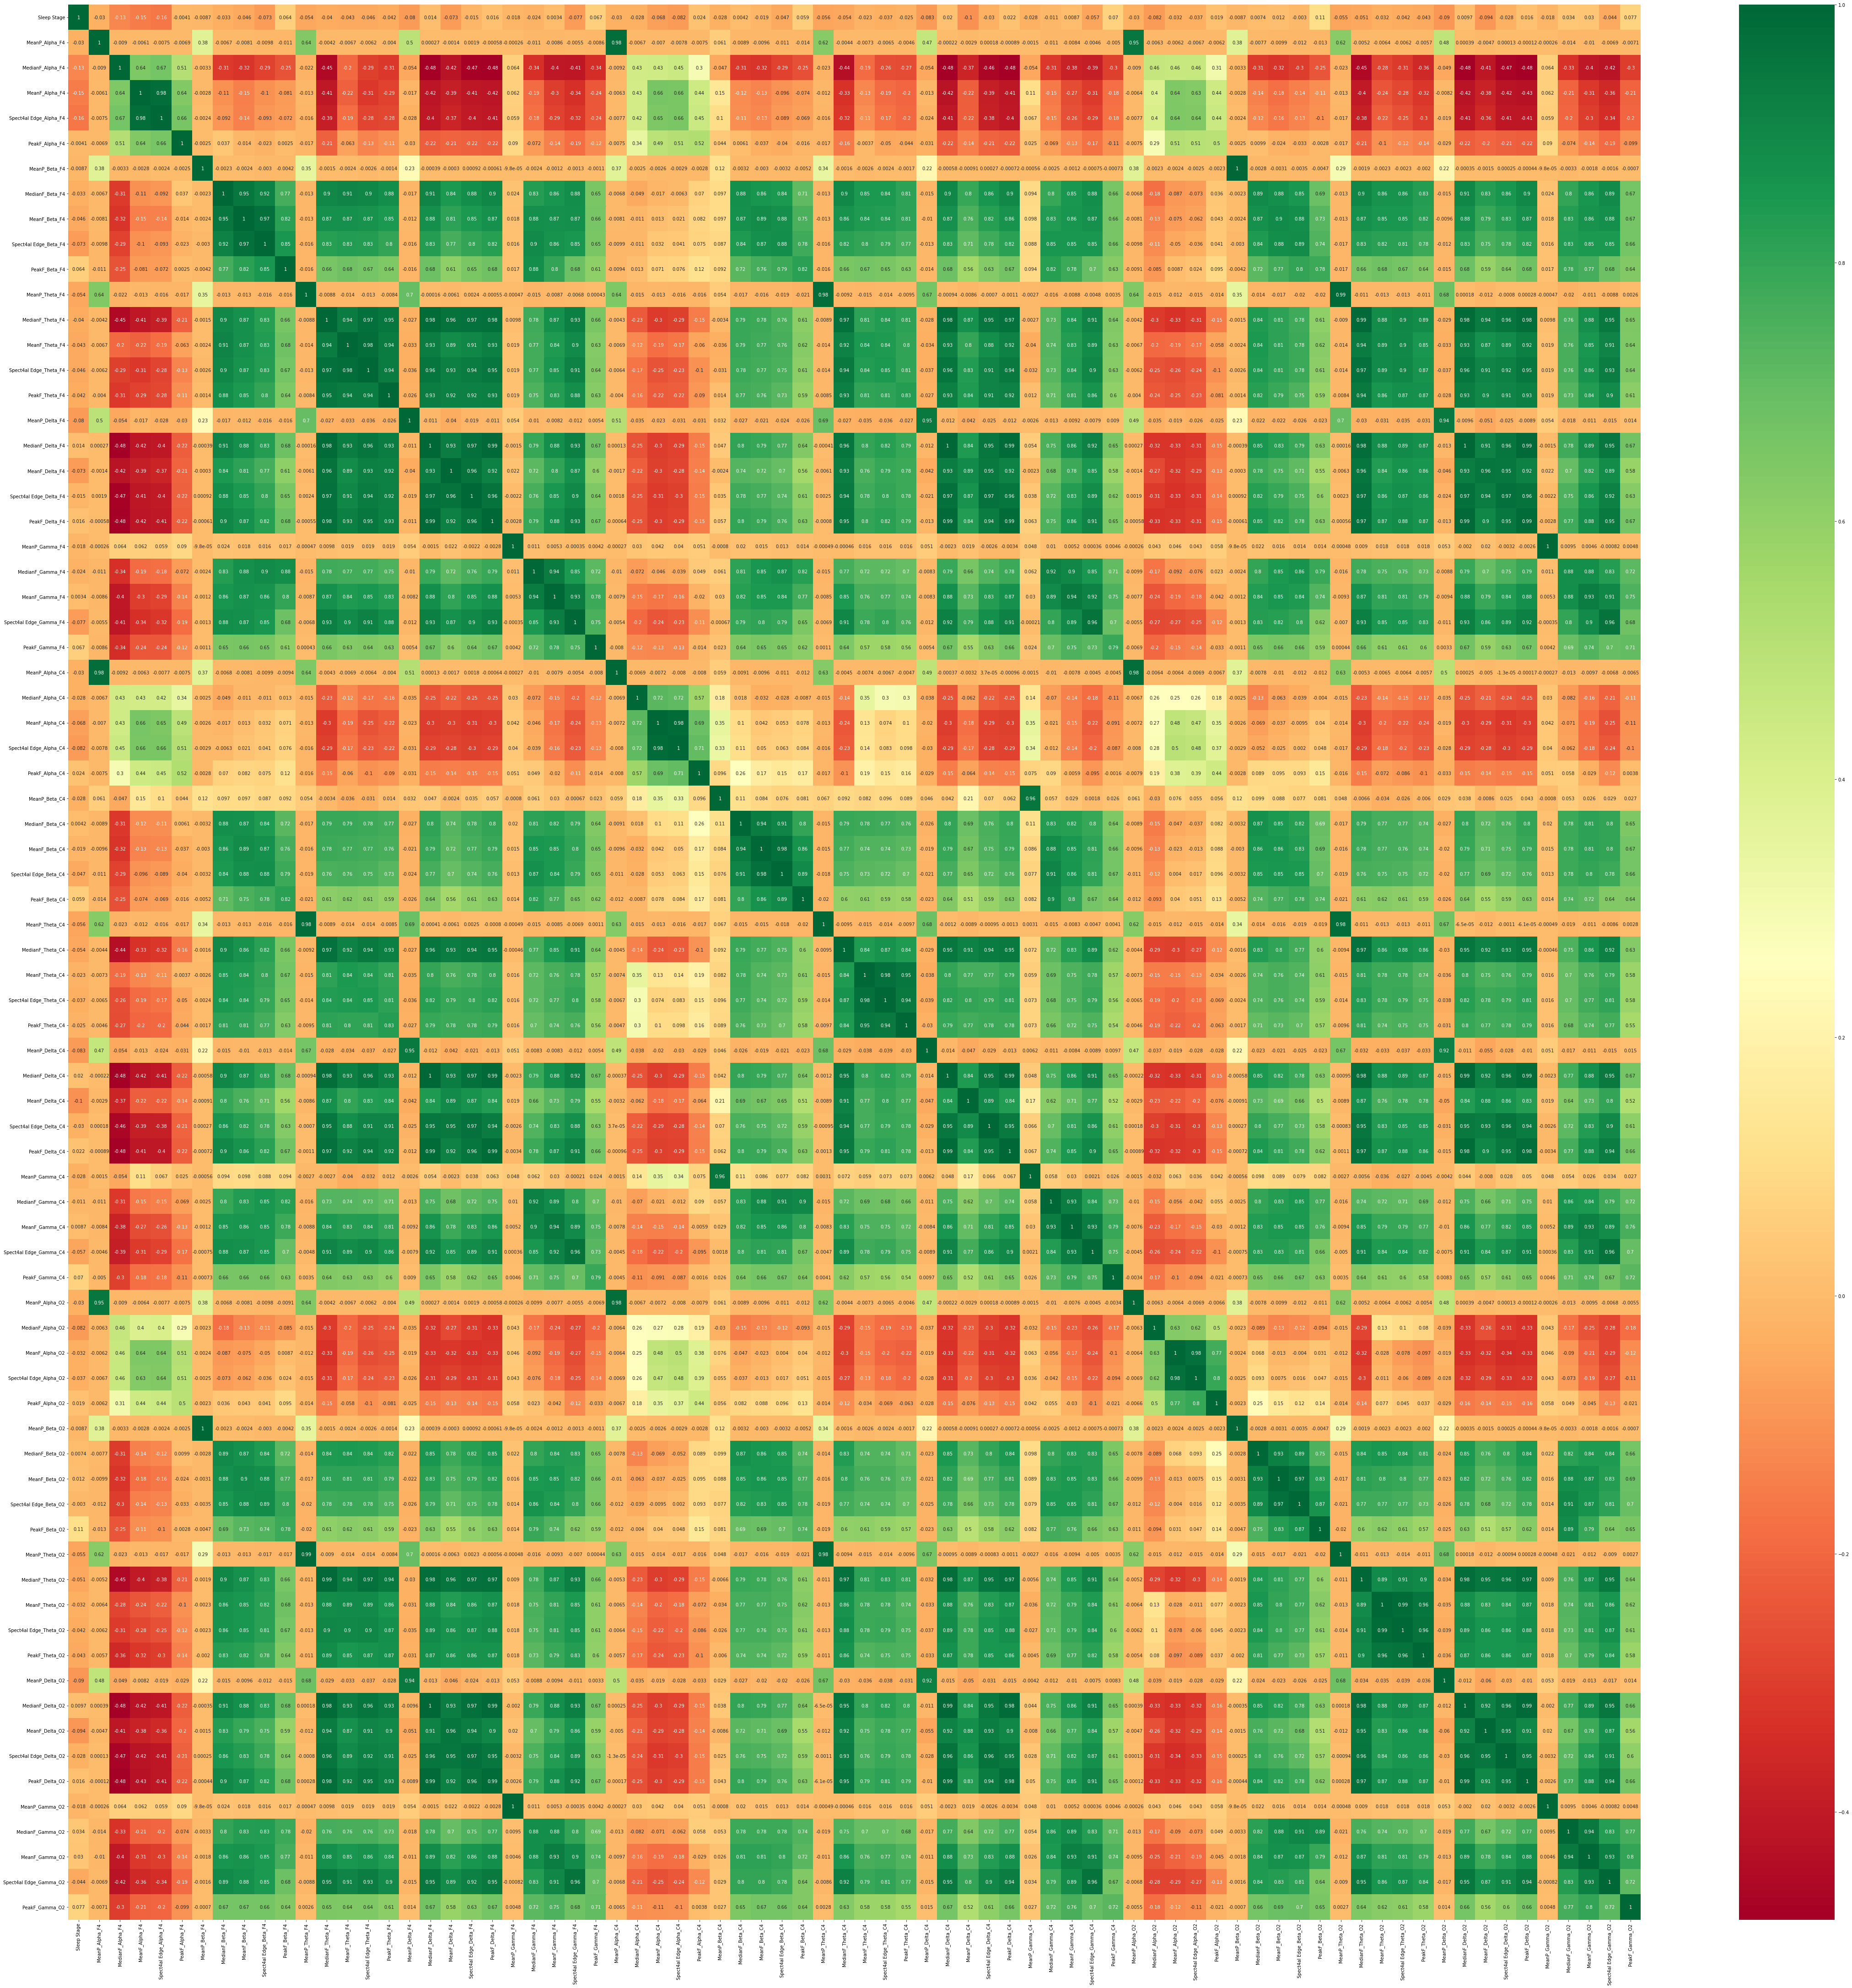

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")